# Mapping seismic stations in the Himalayas with Numpy and Matplotlib
## Part II - Interactive event handling

Here, we extend the plot above by adding an event handler that prints the location (four-letter string) of the station you click on.

We use a threshold for distance, and discriminate between a click below threshold (considered to be 'on') vs a miss, in which case we indicate what the closest station is, its coordinates and the distance to it from the click.

In order to get interactive plot windows that support event handling, we must restart the kernel and activate pylab but *not* in `inline` mode.

In [6]:
%matplotlib notebook
import sys
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

We quickly reload the data using the same approach as in the previous exercise

In [2]:
# Data descriptor to make a proper array.
import os
dt = [('station','S4'), ('lat',np.float32), ('lon',np.float32), 
      ('elev',np.float32) ]
data_fname = os.path.join('data', 'stations.txt')
tab = np.loadtxt(data_fname, dt).view(np.recarray)

We start by defining our `StationPicker` object that will do the job:

In [15]:
class StationPicker(object):
    def __init__(self, figure, stations, eps=0.10, axis=None):
        self.figure = figure
        self.stations = stations
        self.cid = figure.canvas.mpl_connect('button_press_event', self)
        if axis is None:
            axis = figure.axes[0]
        self.axis = axis
        self.eps = eps
        self.w = widgets.HTML()
        self.w

    def __call__(self, event):
        #print 'click', event  # dbg
        if event.inaxes != self.axis:
            return
        self.figure.canvas.draw()
        # Compute the distance from the click to all stations
        lats = self.stations['lat']
        longs = self.stations['lon']
        click_lat, click_long = event.xdata, event.ydata
        lat_d = lats - click_lat
        lon_d = longs - click_long
        dist = np.sqrt(lat_d**2 + lon_d**2)
        nearest_i = dist.argmin()
        near_dist = dist[nearest_i]
        nearest = self.stations[nearest_i]
        #print 'Nearest distance:', near_dist  # dbg
        if near_dist < self.eps:
            w.value = "HIT! You clicked on", nearest['station']
        else:
            vv = "No hit, nearest is:", nearest['station']
            vv += "It is at:", nearest['lat'], nearest['lon']
            vv += "Distance to it:", near_dist
            w.value = vv
        sys.stdout.flush()

<IPython.core.display.Javascript object>


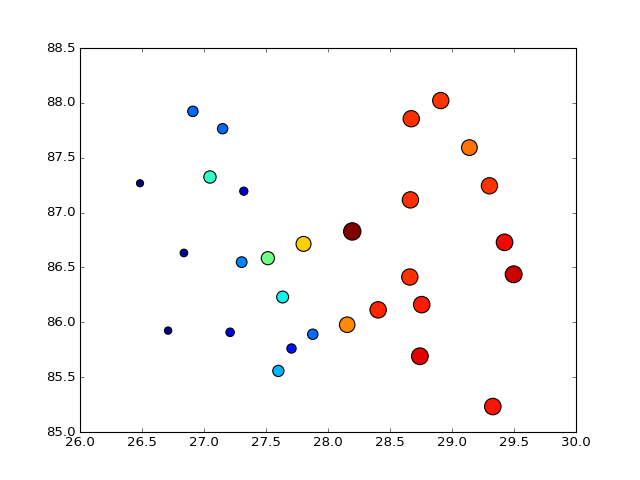

In [16]:
fig, ax = plt.subplots()
ax.scatter(tab['lat'], tab['lon'], 40*(tab['elev']+1), c=tab['elev'] )
# We can now make a picker with that binds the figure and the data
StationPicker(fig, tab)